In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display
%matplotlib inline

#from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures, LabelEncoder
from sklearn.tree import DecisionTreeClassifier

from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.utils import check_X_y

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler  # балансировка классов
from imblearn.pipeline import Pipeline # используем из-за чуждой балансировки

from collections import Counter

import seaborn as sns

### Начало!!

In [2]:
#df = pd.read_csv('post_07_10_2020_1.csv', sep=';')
df = pd.read_csv('Ispytat_28_01_2021_1_year.csv', sep=';')

In [3]:
df

,НомерСтроки,Артикул,КодХарактеристики,ГруппаНоменклатуры,Номенклатура,ЕдиницаИзмерения,БазоваяЕдиницаИзмеренияАйриса,ОптоваяФасовкаАйрис,КоэффициентЕдиницы,СредниеПродажи,...,КоличествоДнейНаСкладе,ЗакупкаЗаПериод,СтатусТовараАйриса,КатегорияТовара,КатегорияТовараАйриса,ЗакупочнаяЦена,КоэффициентМинимальнойПоставкиИзлишков,МинимальныйСтраховойЗапас,ЗначениеТочкиЗаказа,ОсновнойПоставщик
0,1,612807.0,NaN,<Объект не найден> (71:a2f0002590e2e24b11eb50b...,"1178 Набор для творчества Велюрики ""Совушка""11см",шт,шт,1.00,1.0,0.000,...,50,12.0,Удалить,B,NaN,90.72,0,0.0,0.0,Лобжина Виктория Шамхорбековна(ИП)
1,2,NaN,NaN,NaN,xxx,шт,NaN,1.00,1.0,0.000,...,0,0.0,Новинка,NaN,NaN,0.00,0,0.0,0.0,Котляр Мария Марковна
2,3,167002.0,NaN,"ООО ""Арт-Пак""","GL35 Вешалка пластиковая, черная, 35 см",шт,шт,300.00,1.0,0.000,...,0,0.0,Удалить,NaN,NaN,48.00,0,0.0,0.0,Арт-Пак-М ООО
3,4,167010.0,NaN,"ООО ""Арт-Пак""","R42 Вешалка пластиковая, черная, 42 см",шт,шт,150.00,1.0,0.000,...,0,150.0,Регулярный,NaN,A,29.05,0,0.0,0.0,Арт-Пак-М ООО
4,5,167012.0,NaN,"ООО ""Арт-Пак""","V42 Вешалка пластиковая, черная, 42 см",шт,шт,100.00,1.0,0.000,...,0,100.0,Регулярный,A,B,33.57,0,0.0,0.0,Арт-Пак-М ООО
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51181,51182,7708952.0,NaN,яДеревянные декоративные элементы,"Шишки декоративные YW150, 250гр",упак,упак,1.00,1.0,0.000,...,0,0.0,Исключенный,NaN,NaN,158.38,0,0.0,0.0,Китай DongJiang
51182,51183,424199.0,NaN,яЛатексная резинка,26-07005/15 Резинка латексная бел. ГР,кг,кг,7.00,1.0,0.000,...,0,0.0,Исключенный,NaN,A,1084.10,0,0.0,0.0,ПРОТОС и К ООО
51183,51184,7724860.0,8.0,яТесьма отделочная,"7165 Тесьма отделочная 1,6 см*27,42м ДУ",м,м,27.42,1.0,0.163,...,366,0.0,Удалить,NaN,NaN,38.72,0,0.0,0.0,Дубай Beauty Mond Fashion
51184,51185,501484.0,NaN,яТкани в лоскутах разные,"23646 Ткань ""ДЕКОР 7/12"" с принтом 50*50см (60...",шт,шт,1.00,1.0,0.000,...,0,1.0,Удалить,NaN,NaN,64.78,0,0.0,0.0,Колупаева Оксана Леонидовна


In [4]:
df[df['МинимальныйСтраховойЗапас']==0.000] # быстрая оценка значений классов:

,НомерСтроки,Артикул,КодХарактеристики,ГруппаНоменклатуры,Номенклатура,ЕдиницаИзмерения,БазоваяЕдиницаИзмеренияАйриса,ОптоваяФасовкаАйрис,КоэффициентЕдиницы,СредниеПродажи,...,КоличествоДнейНаСкладе,ЗакупкаЗаПериод,СтатусТовараАйриса,КатегорияТовара,КатегорияТовараАйриса,ЗакупочнаяЦена,КоэффициентМинимальнойПоставкиИзлишков,МинимальныйСтраховойЗапас,ЗначениеТочкиЗаказа,ОсновнойПоставщик
0,1,612807.0,NaN,<Объект не найден> (71:a2f0002590e2e24b11eb50b...,"1178 Набор для творчества Велюрики ""Совушка""11см",шт,шт,1.00,1.0,0.000,...,50,12.0,Удалить,B,NaN,90.72,0,0.0,0.0,Лобжина Виктория Шамхорбековна(ИП)
1,2,NaN,NaN,NaN,xxx,шт,NaN,1.00,1.0,0.000,...,0,0.0,Новинка,NaN,NaN,0.00,0,0.0,0.0,Котляр Мария Марковна
2,3,167002.0,NaN,"ООО ""Арт-Пак""","GL35 Вешалка пластиковая, черная, 35 см",шт,шт,300.00,1.0,0.000,...,0,0.0,Удалить,NaN,NaN,48.00,0,0.0,0.0,Арт-Пак-М ООО
3,4,167010.0,NaN,"ООО ""Арт-Пак""","R42 Вешалка пластиковая, черная, 42 см",шт,шт,150.00,1.0,0.000,...,0,150.0,Регулярный,NaN,A,29.05,0,0.0,0.0,Арт-Пак-М ООО
4,5,167012.0,NaN,"ООО ""Арт-Пак""","V42 Вешалка пластиковая, черная, 42 см",шт,шт,100.00,1.0,0.000,...,0,100.0,Регулярный,A,B,33.57,0,0.0,0.0,Арт-Пак-М ООО
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51181,51182,7708952.0,NaN,яДеревянные декоративные элементы,"Шишки декоративные YW150, 250гр",упак,упак,1.00,1.0,0.000,...,0,0.0,Исключенный,NaN,NaN,158.38,0,0.0,0.0,Китай DongJiang
51182,51183,424199.0,NaN,яЛатексная резинка,26-07005/15 Резинка латексная бел. ГР,кг,кг,7.00,1.0,0.000,...,0,0.0,Исключенный,NaN,A,1084.10,0,0.0,0.0,ПРОТОС и К ООО
51183,51184,7724860.0,8.0,яТесьма отделочная,"7165 Тесьма отделочная 1,6 см*27,42м ДУ",м,м,27.42,1.0,0.163,...,366,0.0,Удалить,NaN,NaN,38.72,0,0.0,0.0,Дубай Beauty Mond Fashion
51184,51185,501484.0,NaN,яТкани в лоскутах разные,"23646 Ткань ""ДЕКОР 7/12"" с принтом 50*50см (60...",шт,шт,1.00,1.0,0.000,...,0,1.0,Удалить,NaN,NaN,64.78,0,0.0,0.0,Колупаева Оксана Леонидовна


In [5]:
df['КоэффициентЕдиницы'].unique()

array([  1.  ,   4.  , 100.  ,  10.  ,  50.  ,   5.  ,  72.  ,  36.  ,
        25.  ,  20.  ,   3.  ,   2.  ,   8.  ,  15.  ,  12.  ,   6.  ,
       144.  ,  81.  ,   6.74])

In [6]:
df[df['КоэффициентЕдиницы']==6.74] #быстрая оценка признаков

,НомерСтроки,Артикул,КодХарактеристики,ГруппаНоменклатуры,Номенклатура,ЕдиницаИзмерения,БазоваяЕдиницаИзмеренияАйриса,ОптоваяФасовкаАйрис,КоэффициентЕдиницы,СредниеПродажи,...,КоличествоДнейНаСкладе,ЗакупкаЗаПериод,СтатусТовараАйриса,КатегорияТовара,КатегорияТовараАйриса,ЗакупочнаяЦена,КоэффициентМинимальнойПоставкиИзлишков,МинимальныйСтраховойЗапас,ЗначениеТочкиЗаказа,ОсновнойПоставщик
50730,50731,111199.0,1.0,Ограничители,Ограничитель верхний для метал. молнии #5 0298...,шт,г,674.0,6.74,11.945,...,366,21486.0,Регулярный,A,A,0.25,50,10.0,674.0,Китай MH Industry
50731,50732,111199.0,3.0,Ограничители,Ограничитель верхний для метал. молнии #5 0298...,шт,г,674.0,6.74,10.588,...,366,8499.0,Регулярный,C,B,0.25,50,10.0,674.0,Китай MH Industry
50732,50733,111199.0,2.0,Ограничители,Ограничитель верхний для метал. молнии #5 0298...,шт,г,674.0,6.74,26.982,...,358,17706.0,Регулярный,A,A,0.25,50,10.0,674.0,Китай MH Industry


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51186 entries, 0 to 51185
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   НомерСтроки                             51186 non-null  int64  
 1   Артикул                                 51185 non-null  float64
 2   КодХарактеристики                       31209 non-null  float64
 3   ГруппаНоменклатуры                      51185 non-null  object 
 4   Номенклатура                            51186 non-null  object 
 5   ЕдиницаИзмерения                        51186 non-null  object 
 6   БазоваяЕдиницаИзмеренияАйриса           51103 non-null  object 
 7   ОптоваяФасовкаАйрис                     51186 non-null  float64
 8   КоэффициентЕдиницы                      51186 non-null  float64
 9   СредниеПродажи                          51186 non-null  float64
 10  Цена                                    51186 non-null  fl

#### Начинаем работу со строками:

In [8]:
df.drop(['КоэффициентМинимальнойПоставкиИзлишков',
         'БазоваяЕдиницаИзмеренияАйриса'], axis=1, inplace=True)

In [51]:
df.dropna(subset=['Артикул', 'СтатусТовараАйриса', 'ЕдиницаИзмерения', 'ОптоваяФасовкаАйрис', 
                  'КоэффициентЕдиницы', 'Цена', 'ЗакупочнаяЦена', 'ОсновнойПоставщик'], inplace=True) # подумать насчет СтатусТовараАйриса

In [10]:
ind_for_drop = df[(df['СредниеПродажи'].isna() & df['КоличествоСделок'] > 0)
                  | (df['ЗакупкаЗаПериод'] < 0) | (df['ПроданоВсего'] < 0)
                  | (df['СтатусТовараАйриса'] == 'Исключенный')].index
df_1 = df.drop(list(ind_for_drop))  #### удалить строчки, в ктр средние продажи = 0, а кол-во сделок> 0 и т.д.

In [11]:
df_1[['КодХарактеристики', 'Артикул']] = df_1[['КодХарактеристики', 'Артикул']].astype(dtype='Int32')

In [12]:
df_1.loc[df['МинимальныйСтраховойЗапас'] < 1, 'МинимальныйСтраховойЗапас'] = 0.001

In [13]:
len(list(ind_for_drop))

1785

In [14]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49347 entries, 0 to 51185
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   НомерСтроки                49347 non-null  int64  
 1   Артикул                    49347 non-null  Int32  
 2   КодХарактеристики          30002 non-null  Int32  
 3   ГруппаНоменклатуры         49347 non-null  object 
 4   Номенклатура               49347 non-null  object 
 5   ЕдиницаИзмерения           49347 non-null  object 
 6   ОптоваяФасовкаАйрис        49347 non-null  float64
 7   КоэффициентЕдиницы         49347 non-null  float64
 8   СредниеПродажи             49347 non-null  float64
 9   Цена                       49347 non-null  float64
 10  ПроданоВсего               49347 non-null  float64
 11  КоличествоСделок           49347 non-null  int64  
 12  КоличествоПериодовПродаж   49347 non-null  int64  
 13  КоличествоДнейНаСкладе     49347 non-null  int

In [15]:
df_1.describe(include='object')

,ГруппаНоменклатуры,Номенклатура,ЕдиницаИзмерения,СтатусТовараАйриса,КатегорияТовара,КатегорияТовараАйриса,ОсновнойПоставщик
count,49347,49347,49347,49347,36368,32844,49347
unique,1032,26111,62,18,4,4,657
top,Астра,Бисер Preciosa 5г,шт,Регулярный,C,C,ПРОТОС и К ООО
freq,1594,460,28140,21076,14878,17832,2417


In [16]:
df_1[['МинимальныйСтраховойЗапас', 'ЗначениеТочкиЗаказа']].head(100)

,МинимальныйСтраховойЗапас,ЗначениеТочкиЗаказа
0,0.001,0.0
2,0.001,0.0
3,0.001,0.0
4,0.001,0.0
5,0.001,0.0
...,...,...
97,1.000,2.0
98,1.000,2.0
99,1.000,2.0
100,1.000,2.0


In [17]:
df_1.describe()

,НомерСтроки,Артикул,КодХарактеристики,ОптоваяФасовкаАйрис,КоэффициентЕдиницы,СредниеПродажи,Цена,ПроданоВсего,КоличествоСделок,КоличествоПериодовПродаж,КоличествоДнейНаСкладе,ЗакупкаЗаПериод,ЗакупочнаяЦена,МинимальныйСтраховойЗапас,ЗначениеТочкиЗаказа
count,49347.000000,4.934700e+04,30002.000000,49347.000000,49347.000000,49347.000000,49347.000000,49347.000000,49347.000000,49347.000000,49347.000000,49347.000000,49347.000000,49347.000000,49347.000000
mean,25622.974061,3.834963e+06,35.555163,16.145875,1.131563,0.844355,219.839607,8.978914,3.928263,1.988084,210.384036,139.237430,102.571595,1.840141,9.535734
std,14911.174159,1.735179e+07,77.668665,44.293181,2.666191,4.158172,506.155512,44.082630,10.443877,2.721347,165.622042,506.395733,363.216267,3.459497,25.677708
min,1.000000,1.230000e+03,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.000000
25%,12547.500000,4.986295e+05,2.000000,1.000000,1.000000,0.000000,29.000000,0.000000,0.000000,0.000000,0.000000,6.000000,11.110000,0.001000,0.000000
50%,25846.000000,6.611780e+05,6.000000,4.000000,1.000000,0.079000,101.000000,1.000000,1.000000,1.000000,307.000000,33.000000,36.800000,0.001000,2.000000
75%,38656.500000,7.715682e+06,23.000000,12.000000,1.000000,0.605000,236.000000,6.122500,4.000000,3.000000,366.000000,123.000000,83.065000,3.000000,10.000000
max,51186.000000,7.726618e+08,774.000000,1000.000000,144.000000,430.750000,19068.000000,3911.340000,449.000000,12.000000,366.000000,35041.000000,22500.000000,100.000000,1000.000000


In [63]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49347 entries, 0 to 51185
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   НомерСтроки                49347 non-null  int64  
 1   Артикул                    49347 non-null  Int32  
 2   КодХарактеристики          30002 non-null  Int32  
 3   ГруппаНоменклатуры         49347 non-null  object 
 4   Номенклатура               49347 non-null  object 
 5   ЕдиницаИзмерения           49347 non-null  object 
 6   ОптоваяФасовкаАйрис        49347 non-null  float64
 7   КоэффициентЕдиницы         49347 non-null  float64
 8   СредниеПродажи             49347 non-null  float64
 9   Цена                       49347 non-null  float64
 10  ПроданоВсего               49347 non-null  float64
 11  КоличествоСделок           49347 non-null  int64  
 12  КоличествоПериодовПродаж   49347 non-null  int64  
 13  КоличествоДнейНаСкладе     49347 non-null  int

In [104]:
#df_1.groupby('ЗначениеТочкиЗаказа').nunique()

df_1['freq_z']=df.groupby(by='ЗначениеТочкиЗаказа')['ЗначениеТочкиЗаказа'].transform('count')
df_1['freq_s']=df.groupby(by='МинимальныйСтраховойЗапас')['МинимальныйСтраховойЗапас'].transform('count')

df_1 = df_1[(df_1['freq_z'] >= 10) & (df_1['freq_s'] >= 10)].drop(['freq_s', 'freq_s'],  axis=1)
#df_1.groupby(['Name','City']).filter(lambda x: sum(x['Age']) > 30)

In [105]:
X = df_1.drop(['МинимальныйСтраховойЗапас', 'ЗначениеТочкиЗаказа'], axis=1)
y = df_1.loc[:, ['МинимальныйСтраховойЗапас', 'ЗначениеТочкиЗаказа']]   # таргет

In [106]:
#y_need = y[df_1['МинимальныйСтраховойЗапас'].isna()] # отфильтровываем неизвестные значения МИН
#X_need = X.loc[list(y_need.index)] 

#y_filter = y.drop(list(y_need.index))      # формируем значения МИН и МАХа на ктр будем обучаться

#X_filter = X.drop(list(y_need.index))      # формируем соответствующие данные на ктр будем обучаться

In [107]:
y

,МинимальныйСтраховойЗапас,ЗначениеТочкиЗаказа
0,0.001,0.0
2,0.001,0.0
3,0.001,0.0
4,0.001,0.0
5,0.001,0.0
...,...,...
51177,3.000,5.0
51179,0.001,0.0
51183,0.001,0.0
51184,0.001,0.0


In [108]:
y_need = y[(y['ЗначениеТочкиЗаказа'] == 0)]  # убрал из выражения:y['МинимальныйСтраховойЗапас'] == 0) & ....
X_need = X.loc[list(y_need.index)]

y_filter = y.drop(list(y_need.index))      # формируем значения МИН и МАХа на ктр будем обучаться

X_filter = X.drop(list(y_need.index))      # формируем соответствующие данные на ктр будем обучаться

In [109]:
y_filter_min = y_filter['МинимальныйСтраховойЗапас']
y_filter_max = y_filter['ЗначениеТочкиЗаказа']

In [110]:
y_need.shape

(23219, 2)

In [111]:
X_filter


,НомерСтроки,Артикул,КодХарактеристики,ГруппаНоменклатуры,Номенклатура,ЕдиницаИзмерения,ОптоваяФасовкаАйрис,КоэффициентЕдиницы,СредниеПродажи,Цена,...,КоличествоСделок,КоличествоПериодовПродаж,КоличествоДнейНаСкладе,ЗакупкаЗаПериод,СтатусТовараАйриса,КатегорияТовара,КатегорияТовараАйриса,ЗакупочнаяЦена,ОсновнойПоставщик,freq_z
9,10,502677,<NA>,"Воротники декоративные, лейсы",2785901 Аппликации пришивные лейсы полиэстер 1...,упак,1.0,1.0,0.078,65.0,...,1,1,366,48.00,Регулярный,C,C,19.60,СИМА-ЛЕНД ООО ТД (СИМАОПТ ООО (СУВЕНИРОПТИМПОР...,5536
10,11,502962,<NA>,"Воротники декоративные, лейсы",2797325 Аппликации пришивные лейсы полиэстер 2...,упак,1.0,1.0,0.684,93.0,...,9,6,360,66.00,Регулярный,B,C,30.87,СИМА-ЛЕНД ООО ТД (СИМАОПТ ООО (СУВЕНИРОПТИМПОР...,5536
11,12,502963,<NA>,"Воротники декоративные, лейсы",2797327 Аппликации пришивные лейсы полиэстер 2...,упак,1.0,1.0,0.415,99.0,...,2,2,162,38.00,Решение принято,B,C,33.12,СИМА-ЛЕНД ООО ТД (СИМАОПТ ООО (СУВЕНИРОПТИМПОР...,5536
12,13,502964,<NA>,"Воротники декоративные, лейсы",2797329 Аппликации пришивные лейсы полиэстер 2...,упак,1.0,1.0,0.672,118.0,...,6,6,327,66.00,Регулярный,B,C,41.00,СИМА-ЛЕНД ООО ТД (СИМАОПТ ООО (СУВЕНИРОПТИМПОР...,5536
13,14,506265,<NA>,"Воротники декоративные, лейсы","3020259 Воротник пришивной,кружево, 24*23,5см ...",шт,1.0,1.0,0.529,75.0,...,4,4,366,20.00,Спецзаказ,C,B,21.00,СИМА-ЛЕНД ООО ТД (СИМАОПТ ООО (СУВЕНИРОПТИМПОР...,5536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51172,51173,7700966,1,Цепи,"Цепь стальная 10,7*7,1*10м Y1611",м,10.0,10.0,0.795,195.0,...,7,5,366,302.53,Регулярный,A,A,38.50,Китай Yuantong,4451
51173,51174,7700963,2,Цепи,"Цепь стальная 5,4*3,8*10м Y21303",м,10.0,10.0,0.000,120.0,...,0,0,0,13.49,Удалить,B,B,66.00,Китай Yuantong,4451
51174,51175,7700965,2,Цепи,"Цепь стальная 9,9*7,2*10м Y1830",м,10.0,10.0,1.470,282.0,...,19,8,366,207.26,Регулярный,A,A,55.87,Китай Yuantong,4451
51175,51176,7700967,1,Цепи,"Цепь стальная BOX 3,5*10м",м,10.0,10.0,0.271,437.0,...,5,4,366,64.93,Удалить,B,B,220.00,Китай Yuantong,4451


In [112]:
y_filter

,МинимальныйСтраховойЗапас,ЗначениеТочкиЗаказа
9,1.0,2.0
10,1.0,2.0
11,1.0,2.0
12,1.0,2.0
13,1.0,2.0
...,...,...
51172,2.0,10.0
51173,2.0,10.0
51174,2.0,10.0
51175,2.0,10.0


#### Построим гистограммы, чтоб визуально посмотреть на частотное распределение меток классов МИН и МАХ: 

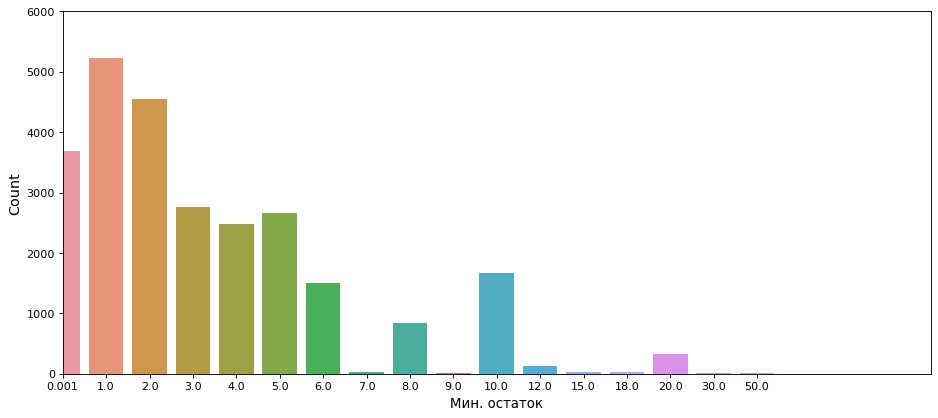

In [115]:
from matplotlib.pyplot import figure

fig,ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x='МинимальныйСтраховойЗапас', data=y_filter)
plt.xlabel('Мин. остаток', fontsize=12)
plt.ylabel('Count', fontsize=13)
plt.axis([0, 20, 0, 6000])
plt.show()


#fig,ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
#sns.countplot(x='МинимальныйСтраховойЗапас', data=y_filter)
#plt.xlabel('Мин. остаток', fontsize=12)
#plt.ylabel('Count', fontsize=13)
#plt.axis([21, 35, 0, 6000])
#plt.show()

In [116]:
print(y_filter.loc[:, 'МинимальныйСтраховойЗапас'].value_counts())
print(len(y_filter.loc[:, 'МинимальныйСтраховойЗапас'].value_counts()))
print(y_filter.loc[:, 'МинимальныйСтраховойЗапас'].value_counts().sum())

1.000     5230
2.000     4552
0.001     3695
3.000     2763
5.000     2657
4.000     2479
10.000    1667
6.000     1499
8.000      840
20.000     320
12.000     131
7.000       28
18.000      23
15.000      22
50.000      21
30.000      12
9.000       11
Name: МинимальныйСтраховойЗапас, dtype: int64
17
25950


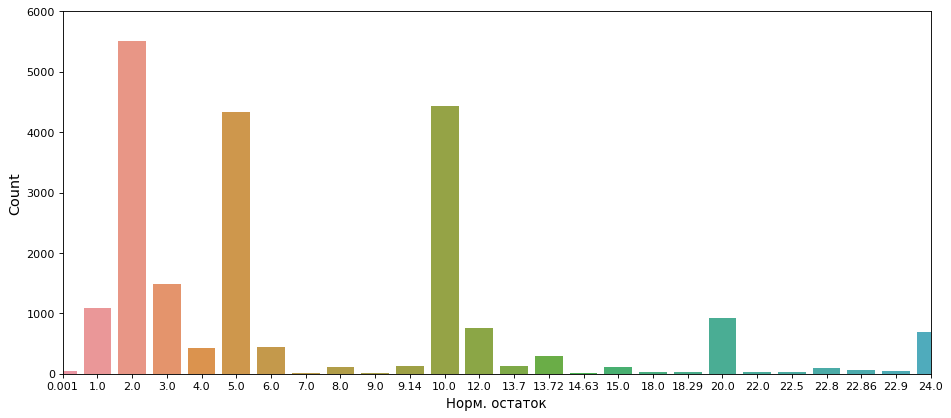

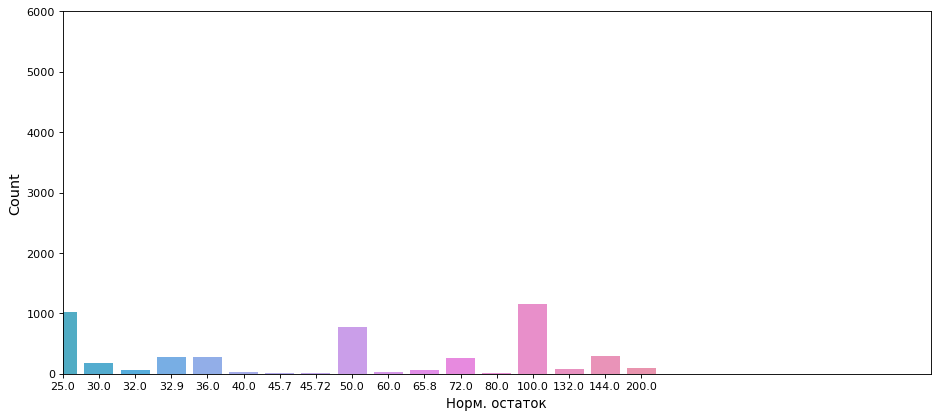

In [119]:
# figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
fig,ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x='ЗначениеТочкиЗаказа', data=y_filter)
# plt.axis([0.0, 70])
plt.xlabel('Норм. остаток', fontsize=12)
plt.ylabel('Count', fontsize=13)
#ax.set(xlim=(0, 300))
plt.axis([0.0, 25, 0, 6000])
#ax.set_xticklabels(range(0,50))
plt.show()


# figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
fig,ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x='ЗначениеТочкиЗаказа', data=y_filter)
# plt.axis([0.0, 70])
plt.xlabel('Норм. остаток', fontsize=12)
plt.ylabel('Count', fontsize=13)
#plt.xticks(y_filter.loc[:, 'Нормативный остаток'])
#ax.set(xlim=(0, 100))
plt.axis([26, 50, 0, 6000])
# ax.set_xticklabels(range(0,50))
plt.show()


In [120]:
print(y_filter.loc[:, 'ЗначениеТочкиЗаказа'].value_counts().head(60))
len(y_filter.loc[:, 'ЗначениеТочкиЗаказа'].value_counts())

2.000      5502
10.000     4427
5.000      4327
3.000      1492
100.000    1155
1.000      1096
25.000     1016
20.000      930
50.000      782
12.000      756
24.000      695
6.000       442
4.000       423
13.720      296
144.000     290
32.900      286
36.000      273
72.000      259
30.000      184
13.700      135
9.140       130
15.000      111
8.000       108
22.800      100
200.000      96
132.000      79
32.000       67
65.800       63
22.860       59
22.900       54
0.001        44
40.000       34
22.500       34
22.000       28
60.000       28
18.290       26
18.000       24
7.000        21
9.000        19
45.720       19
14.630       17
45.700       13
80.000       10
Name: ЗначениеТочкиЗаказа, dtype: int64


43

#### Создаем Pipeline

In [31]:
le = LabelEncoder()  #Делаем label encoding

y_filter_min_le = le.fit_transform(y_filter_min)
y_filter_max_le = le.fit_transform(y_filter_max)

In [32]:
len(y_filter_min_le)

26128

In [35]:
# Начнем трансформировать колонки, в зависимости от типа значений:
categorical_features = X_filter.select_dtypes(include=[object])

In [50]:
#categorical_features = categorical_features.drop(['Номенклатура'], axis=1) # ненужно для обучения
categorical_features[categorical_features['КатегорияТовараАйриса'] == "A"]

,ГруппаНоменклатуры,ЕдиницаИзмерения,СтатусТовараАйриса,КатегорияТовара,КатегорияТовараАйриса,ОсновнойПоставщик
42,Разное,шт,Регулярный,A,A,Лукьянова Ольга Александровна(ИП)
44,Разное,шт,Регулярный,A,A,Лукьянова Ольга Александровна(ИП)
49,Разное,упак (4шт),Фасовка,B,A,Лукьянова Ольга Александровна(ИП)
50,Разное,шт,Регулярный,A,A,Лукьянова Ольга Александровна(ИП)
337,Prym,пар,Регулярный,A,A,Prym Consumer Europe GmbH - ПРИМ (Германия)
...,...,...,...,...,...,...
51169,Цепи,м,Регулярный,A,A,Китай LG industry
51170,Цепи,м,Регулярный,A,A,Китай LG industry
51171,Цепи,м,Регулярный,A,A,Китай LG industry
51172,Цепи,м,Регулярный,A,A,Китай Yuantong


In [37]:
numerical_features = X_filter.select_dtypes(include=[np.number])

In [38]:
numerical_features = numerical_features.drop(['НомерСтроки', 'Артикул', 'КодХарактеристики'], axis=1) # ненужно для обучения
numerical_features

,ОптоваяФасовкаАйрис,КоэффициентЕдиницы,СредниеПродажи,Цена,ПроданоВсего,КоличествоСделок,КоличествоПериодовПродаж,КоличествоДнейНаСкладе,ЗакупкаЗаПериод,ЗакупочнаяЦена
9,1.0,1.0,0.078,65.0,1.000,1,1,366,48.00,19.60
10,1.0,1.0,0.684,93.0,8.821,9,6,360,66.00,30.87
11,1.0,1.0,0.415,99.0,2.493,2,2,162,38.00,33.12
12,1.0,1.0,0.672,118.0,8.665,6,6,327,66.00,41.00
13,1.0,1.0,0.529,75.0,6.827,4,4,366,20.00,21.00
...,...,...,...,...,...,...,...,...,...,...
51172,10.0,10.0,0.795,195.0,10.254,7,5,366,302.53,38.50
51173,10.0,10.0,0.000,120.0,0.000,0,0,0,13.49,66.00
51174,10.0,10.0,1.470,282.0,18.965,19,8,366,207.26,55.87
51175,10.0,10.0,0.271,437.0,3.490,5,4,366,64.93,220.00


In [39]:
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26128 entries, 9 to 51177
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ОптоваяФасовкаАйрис       26128 non-null  float64
 1   КоэффициентЕдиницы        26128 non-null  float64
 2   СредниеПродажи            26128 non-null  float64
 3   Цена                      26128 non-null  float64
 4   ПроданоВсего              26128 non-null  float64
 5   КоличествоСделок          26128 non-null  int64  
 6   КоличествоПериодовПродаж  26128 non-null  int64  
 7   КоличествоДнейНаСкладе    26128 non-null  int64  
 8   ЗакупкаЗаПериод           26128 non-null  float64
 9   ЗакупочнаяЦена            26128 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 2.2 MB


In [52]:
len(y_filter_min_le)

26128

In [53]:
# будем вставлять 0
numerical_features_1 = numerical_features[
    ['СредниеПродажи', 'ПроданоВсего','КоличествоСделок', 'КоличествоПериодовПродаж', 'ЗакупкаЗаПериод']
]         
numerical_features_2 = numerical_features.drop(numerical_features_1.columns, axis=1)


In [54]:
# здесь устанавливаем, что заполняем нулями отсутствующ. значения
imp_const = SimpleImputer(missing_values=np.nan, strategy='constant')

In [55]:
# указываем колонки для трансформации (общие и для мин и для мах):
numerical_features_1_col = numerical_features_1.columns  # будем вставлять 0 и производить PolynomialFeatures
numerical_features_2_col = numerical_features_2.columns  # будем только производить PolynomialFeatures
categorical_features_col = categorical_features.columns  # будем производить OHE

# указываем какой препроцессинг будем делать на разных колонках (параметры скалирования зададим непосредств.в grid_search):
numerical_transformer_1 = Pipeline(
    steps=[
        ('imp_const', imp_const),
        ('poly', PolynomialFeatures(interaction_only=True,include_bias = False)),
        ('scaler', 'passthrough')
        ]
)
numerical_transformer_2 = Pipeline(
    steps=[
        ('poly', PolynomialFeatures(interaction_only=True,include_bias = False)),
        ('scaler', 'passthrough')
        ]
)
categorical_transformer = Pipeline(
    steps=[
        ('imp_const', imp_const),
        ('ОНЕ', OneHotEncoder(sparse=False, handle_unknown='ignore'))
        ]
)

# создаем общий трансформатор:
data_transformer = ColumnTransformer(
    transformers=[
        ('numerical_1', numerical_transformer_1, numerical_features_1_col),
        ('numerical_2', numerical_transformer_2, numerical_features_2_col),
        ('categorical', categorical_transformer, categorical_features_col)])

In [56]:
X_filter_trans = data_transformer.fit_transform(X_filter)

### сюда нужно перенести балансироваку классов!!!:

In [ ]:
ros = RandomOverSampler(random_state=0)

#X_resampled_min, y_resampled_min = ros.fit_resample(X_filter_trans, y_filter_min_le)
#X_resampled_max, y_resampled_max = ros.fit_resample(X_filter_trans, y_filter_max_le)


### Наконец то подошли к классификации!!

In [ ]:
# 1. обратить внимание на балансировку внутри эстиматора....нужна ли она?
# 2. стандартизация нужна ли для деревьев и леса...и какая? (вроде для деревьев не нужна стандартизация)
# 3. Сейчас включен рандом форест на 5ой b 6ой версии))

In [ ]:
# RandomForestClassifier
en_RF = Pipeline(
    steps=[('preprocessor', data_transformer),
           ('ros', RandomOverSampler(random_state=0)),
           ('RF', RandomForestClassifier(random_state=42, class_weight='balanced'))
        ]
)

In [ ]:
X_train, X_test, y_train, y_test = tts(X, y, random_state=42)
pipeline.fit(X_train, y_train) 

X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(
    X_resampled_min, y_resampled_min, test_size=0.33, random_state=42
)
X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(
    X_resampled_max, y_resampled_max, test_size=0.33, random_state=42
)

In [ ]:
# Создаем сетку поиска

# для RandomForestClassifier:
param_grid_rf = {
    'preprocessor__numerical_1__scaler': [StandardScaler()],
    'RF__criterion':['gini','entropy'],
    'RF__max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
}


In [ ]:
grid_search_min = GridSearchCV(en_RF, param_grid=param_grid_rf)
grid_search_max = GridSearchCV(en_RF, param_grid=param_grid_rf)

In [ ]:
grid_min = grid_search_min.fit(X_train_min, y_train_min)

In [ ]:
grid_min.best_params_

In [ ]:
grid_max = grid_search_max.fit(X_train_max, y_train_max)

In [ ]:
grid_max.best_params_

In [ ]:
grid_min.score(X_train_min, y_train_min)

In [ ]:
grid_max.score(X_train_max, y_train_max)

In [ ]:
# 28.01.2021 Как вариант:сохранять рассчитанные параметры в течение мес для каждого магазина, а обновлять мин-макс 1 раз в неделю

In [ ]:
pred_min = grid_min.predict(X_test_min)
pred_max = grid_max.predict(X_test_max)

In [ ]:
# НЕ ЗАБЫТЬ СДЕЛАТЬ ОБРАТНОЕ ПРЕОБРАЗОВАН на  ЛЭЙБЛ!!!!(обратное рпеобразование делать после всех метрик, 
# иначе будет выдавать ошибку: continuous is not supported)

In [ ]:
frame_min = [
    pd.DataFrame(pred_min, columns=['predict']), 
    pd.DataFrame(y_test_min, columns=['Минимальный остаток']).reset_index(drop=True), X_test_min['Фасовка айрис'].reset_index(drop=True)
]
frame_max = [
    pd.DataFrame(pred_max, columns=['predict']), 
    pd.DataFrame(y_test_max, columns=['Нормативный остаток']).reset_index(drop=True), X_test_max['Фасовка айрис'].reset_index(drop=True)
]


In [ ]:
df3_min = pd.concat(frame_min, axis=1)
df3_max = pd.concat(frame_max, axis=1)

In [ ]:
df3_min['prophet'] = df3_min['predict']    # 'это только для МИНИМАЛЬНОГО остатка !!!'
# df3_max['prophet'] = df3_max[['predict', 'Фасовка айрис']].max(axis=1)    # 'это только для НОРМАТИВНОГО остатка !!!'
df3_max['prophet'] = df3_max['predict'] # т.к. было преобразование в label!!!! (иначе бы использовали строку выше)

In [ ]:
IPython.display.HTML(df3_max.to_html())

In [ ]:
y_test_min

In [ ]:
X_test_min

#### Посмотрим на метрики:

In [ ]:
accuracy_score(df3_min['Минимальный остаток'], df3_min['prophet'])

In [ ]:
accuracy_score(df3_max['Нормативный остаток'], df3_max['prophet'])

In [ ]:
precision_min, recall_min, fscore_min, support_min = score(df3_min['Минимальный остаток'], df3_min["prophet"])
precision_macro_min, recall_macro_min, fscore_macro_min, support_macro_min = score(df3_min['Минимальный остаток'], df3_min["prophet"], average='macro')
precision_micro_min, recall_micro_min, fscore_micro_min, support_micro_min = score(df3_min['Минимальный остаток'], df3_min["prophet"], average='micro')



In [ ]:
precision_max, recall_max, fscore_max, support_max = score(df3_max['Нормативный остаток'], df3_max["prophet"])
precision_macro_max, recall_macro_max, fscore_macro_max, support_macro_max = score(df3_max['Нормативный остаток'], df3_max["prophet"], average='macro')
precision_micro_max, recall_micro_max, fscore_micro_max, support_micro_max = score(df3_max['Нормативный остаток'], df3_max["prophet"], average='micro')

In [ ]:
score_precision_min = pd.DataFrame((precision_min.reshape(26, 1)), columns=['precision_min'])
score_recall_min = pd.DataFrame((recall_min.reshape(26, 1)), columns=['recall_min'])
score_fscore_min = pd.DataFrame((fscore_min.reshape(26, 1)), columns=['fscore_min'])
score_support_min = pd.DataFrame((support_min.reshape(26, 1)), columns=['support_min'])
for_frame_min = [score_precision_min, score_recall_min, score_fscore_min, score_support_min] 
score_all_min = pd.concat(for_frame_min, axis=1)
score_all_min

In [ ]:
score_precision_max = pd.DataFrame((precision_max.reshape(50, 1)), columns=['precision_max'])
score_recall_max = pd.DataFrame((recall_max.reshape(50, 1)), columns=['recall_max'])
score_fscore_max = pd.DataFrame((fscore_max.reshape(50, 1)), columns=['fscore_max'])
score_support_max = pd.DataFrame((support_max.reshape(50, 1)), columns=['support_max'])
for_frame_max = [score_precision_max, score_recall_max, score_fscore_max, score_support_max] 
score_all_max = pd.concat(for_frame_max, axis=1)
score_all_max

In [ ]:
print(f'precision_macro_min={precision_macro_min}, recall_macro_min={recall_macro_min},\
 score_macro_min={fscore_macro_min}, support_macro_min={support_macro_min}')

In [ ]:
print(f'precision_macro_max={precision_macro_max}, recall_macro_max={recall_macro_max},\
 score_macro_max={fscore_macro_max}, support_macro_max={support_macro_max}')

In [ ]:
print(f'precision_micro_min={precision_micro_min}, recall_micro_min={recall_micro_min},\
 score_micro_min={fscore_micro_min}, support_micro_min={support_micro_min}')

In [ ]:
print(f'precision_micro_max={precision_micro_max}, recall_micro_max={recall_micro_max},\
 score_micro_max={fscore_micro_max}, support_micro_max={support_micro_max}')

In [ ]:
#plot_confusion_matrix(clf, df3['Минимальный остаток'], df3['prophet'])
fig,ax = plt.subplots(num=None, figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
confusion_matrix = pd.crosstab(df3_min['Минимальный остаток'], df3_min['prophet'],
                               rownames=['Минимальный остаток'], colnames=['prophet'])

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='coolwarm')
ax.set_title('confusion_matrix for Минимальный остаток ')
plt.show()

In [ ]:
#plot_confusion_matrix(clf, df3['Минимальный остаток'], df3['prophet'])
fig,ax = plt.subplots(num=None, figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')
confusion_matrix = pd.crosstab(df3_max['Нормативный остаток'], df3_max['prophet'],
                               rownames=['Нормативный остаток'], colnames=['prophet'])

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='coolwarm')
ax.set_title('confusion_matrix for Нормативный остаток')
plt.show()

In [ ]:
confusion_matrix

In [ ]:
# ЧТОЬ НЕ ЗАБЫТЬ:

## xgb_clf почитать о ней

## Где то здесь ошибка: 'KNeighborsClassifier_n_neighbors': [2, 3, 4, 5, 6, 7, 8]
## или ('KNeighborsClassifier', MultiOutputClassifier(KNeighborsClassifier()))

# clf = MultiOutputClassifier(KNeighborsClassifier()).fit(X, y)

# Так же посмотреть 

In [ ]:
# 1. Поработать с дисбалансом до testsplit (чтоб заработала стратификация)
# 2. Поигарть с метриками как в папке  MIN-MAX
# 3. Советуют попробовать так же MSE метрику (настойчиво советуют)
# 4. Добавить колонку  минимальный остаток, чтоб понимать по каким мин у нас проваливаются метрики
# 5. Может сравнение все же делать с данными без балансировки??

In [ ]:
##rfmSegmentation.to_csv('rfm-table_mark.csv', sep=';')